## Human vs AI: Prompt and Response Intelligence Analysis

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
df = pd.read_csv("human_vs_ai_dirty.csv")

# Basic inspection
print(df.shape)

(98218, 16)


In [2]:
print(df.columns)

Index(['human_prompt', 'ai_answer_to_human_prompt',
       'human_answer_to_human_prompt', 'ai_prompt', 'ai_answer_to_ai_prompt',
       'human_answer_to_ai_prompt', 'response_accuracy', 'prompt_category',
       'ai_response_length', 'human_response_length', 'ai_sentiment_score',
       'human_sentiment_score', 'winner', 'entry_date', 'response_source',
       'ai_readability_score', 'human_readability_score',
       'response_relevance_score'],
      dtype='object')


In [3]:
print(df.head())

                                        human_prompt  \
0             Level guy behavior effort how trouble.   
1  Middle certain popular enjoy particular price ...   
2                                Spring rest accept.   
3            Five best include finish gas education.   
4             Seek according lay own provide inside.   

                           ai_answer_to_human_prompt  \
0  Feel population political remain leave care po...   
1  Attorney economy idea. Community me anything l...   
2  Live before me education month set she. Someti...   
3  Table condition something loss experience. War...   
4  Around wall value. Hear save real law take. On...   

                        human_answer_to_human_prompt  \
0  Discuss conference matter trip create suddenly...   
1  Safe that policy speech mean light debate mode...   
2  Late message role ever my group show. Operatio...   
3  Turn nearly laugh war task cell speech arm. On...   
4  Effect plant develop individual customer. S

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100500 entries, 0 to 100499
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   human_prompt                  100500 non-null  object 
 1   ai_answer_to_human_prompt     99996 non-null   object 
 2   human_answer_to_human_prompt  99998 non-null   object 
 3   ai_prompt                     100500 non-null  object 
 4   ai_answer_to_ai_prompt        100500 non-null  object 
 5   human_answer_to_ai_prompt     100500 non-null  object 
 6   response_accuracy             100500 non-null  float64
 7   prompt_category               100200 non-null  object 
 8   ai_response_length            100500 non-null  int64  
 9   human_response_length         100500 non-null  int64  
 10  ai_sentiment_score            100500 non-null  float64
 11  human_sentiment_score         100500 non-null  float64
 12  winner                        99998 non-null

In [5]:
df.duplicated().sum()

np.int64(496)

In [6]:
drop = df.drop_duplicates(inplace=True)
drop

In [7]:
df.isna().sum()

human_prompt                      0
ai_answer_to_human_prompt       500
human_answer_to_human_prompt    500
ai_prompt                         0
ai_answer_to_ai_prompt            0
human_answer_to_ai_prompt         0
response_accuracy                 0
prompt_category                 300
ai_response_length                0
human_response_length             0
ai_sentiment_score                0
human_sentiment_score             0
winner                          500
entry_date                        0
response_source                   0
ai_readability_score              0
human_readability_score           0
response_relevance_score          0
dtype: int64

In [8]:
drop_na  = df.dropna(inplace=True)
drop_na

In [10]:
df.columns.tolist()

['human_prompt',
 'ai_answer_to_human_prompt',
 'human_answer_to_human_prompt',
 'ai_prompt',
 'ai_answer_to_ai_prompt',
 'human_answer_to_ai_prompt',
 'response_accuracy',
 'prompt_category',
 'ai_response_length',
 'human_response_length',
 'ai_sentiment_score',
 'human_sentiment_score',
 'winner',
 'entry_date',
 'response_source',
 'ai_readability_score',
 'human_readability_score',
 'response_relevance_score']

In [15]:

df.drop(columns=['entry_date',
 'response_source',
 'ai_readability_score',
 'human_readability_score',
 'response_relevance_score'], inplace=True)



In [16]:
df.columns.tolist()

['human_prompt',
 'ai_answer_to_human_prompt',
 'human_answer_to_human_prompt',
 'ai_prompt',
 'ai_answer_to_ai_prompt',
 'human_answer_to_ai_prompt',
 'response_accuracy',
 'prompt_category',
 'ai_response_length',
 'human_response_length',
 'ai_sentiment_score',
 'human_sentiment_score',
 'winner']

In [18]:
# Ensure numeric columns are of correct type
df['ai_response_length'] = pd.to_numeric(df['ai_response_length'], errors='coerce')
df['human_response_length'] = pd.to_numeric(df['human_response_length'], errors='coerce')
df['ai_sentiment_score'] = pd.to_numeric(df['ai_sentiment_score'], errors='coerce')
df['human_sentiment_score'] = pd.to_numeric(df['human_sentiment_score'], errors='coerce')


In [19]:
# Add new columns
df['length_diff'] = df['ai_response_length'] - df['human_response_length']
df['sentiment_gap'] = df['ai_sentiment_score'] - df['human_sentiment_score']
df['is_tie'] = df['winner'].apply(lambda x: 1 if x == 'Tie' else 0)

In [20]:
df.head()

,human_prompt,ai_answer_to_human_prompt,human_answer_to_human_prompt,ai_prompt,ai_answer_to_ai_prompt,human_answer_to_ai_prompt,response_accuracy,prompt_category,ai_response_length,human_response_length,ai_sentiment_score,human_sentiment_score,winner,length_diff,sentiment_gap,is_tie
0,Level guy behavior effort how trouble.,Feel population political remain leave care po...,Discuss conference matter trip create suddenly...,Record ago no pick.,Face wife million force tell friend south. Oft...,Bed senior ago structure. Book lawyer truth pr...,0.73,Health,12,16,-0.65,0.81,AI,-4,-1.46,0
1,Middle certain popular enjoy particular price ...,Attorney economy idea. Community me anything l...,Safe that policy speech mean light debate mode...,Way star your effort tree.,Move move exist already radio lawyer something...,Factor south it anyone. Goal who far return st...,0.80,Environment,20,15,-0.41,-0.05,Tie,5,-0.36,1
2,Spring rest accept.,Live before me education month set she. Someti...,Late message role ever my group show. Operatio...,Lawyer true our late fear us move.,Care our second still either. On one especiall...,Letter also decade animal school. State him ne...,0.89,Environment,15,23,0.96,0.72,Tie,-8,0.24,1
3,Five best include finish gas education.,Table condition something loss experience. War...,Turn nearly laugh war task cell speech arm. On...,Speech front answer skill money common source.,War attorney where cell assume each growth pow...,Apply study more simple no miss rule. Back ind...,0.82,History,17,12,0.00,0.38,Tie,5,-0.38,1
4,Seek according lay own provide inside.,Around wall value. Hear save real law take. On...,Effect plant develop individual customer. Step...,Discussion law whole nothing act spring campaign.,Important information professional believe. Th...,Actually evidence ability increase statement b...,0.87,Philosophy,14,15,-0.21,-0.55,AI,-1,0.34,0


In [21]:
df.to_csv("human_vs_ai_dirty.csv", index=False)


In [23]:
# Drop rows with missing values in critical fields

df.dropna(subset=['length_diff', 'sentiment_gap', 'is_tie'], inplace=True)
df

,human_prompt,ai_answer_to_human_prompt,human_answer_to_human_prompt,ai_prompt,ai_answer_to_ai_prompt,human_answer_to_ai_prompt,response_accuracy,prompt_category,ai_response_length,human_response_length,ai_sentiment_score,human_sentiment_score,winner,length_diff,sentiment_gap,is_tie
0,Level guy behavior effort how trouble.,Feel population political remain leave care po...,Discuss conference matter trip create suddenly...,Record ago no pick.,Face wife million force tell friend south. Oft...,Bed senior ago structure. Book lawyer truth pr...,0.73,Health,12,16,-0.65,0.81,AI,-4,-1.46,0
1,Middle certain popular enjoy particular price ...,Attorney economy idea. Community me anything l...,Safe that policy speech mean light debate mode...,Way star your effort tree.,Move move exist already radio lawyer something...,Factor south it anyone. Goal who far return st...,0.80,Environment,20,15,-0.41,-0.05,Tie,5,-0.36,1
2,Spring rest accept.,Live before me education month set she. Someti...,Late message role ever my group show. Operatio...,Lawyer true our late fear us move.,Care our second still either. On one especiall...,Letter also decade animal school. State him ne...,0.89,Environment,15,23,0.96,0.72,Tie,-8,0.24,1
3,Five best include finish gas education.,Table condition something loss experience. War...,Turn nearly laugh war task cell speech arm. On...,Speech front answer skill money common source.,War attorney where cell assume each growth pow...,Apply study more simple no miss rule. Back ind...,0.82,History,17,12,0.00,0.38,Tie,5,-0.38,1
4,Seek according lay own provide inside.,Around wall value. Hear save real law take. On...,Effect plant develop individual customer. Step...,Discussion law whole nothing act spring campaign.,Important information professional believe. Th...,Actually evidence ability increase statement b...,0.87,Philosophy,14,15,-0.21,-0.55,AI,-1,0.34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,Certainly garden police opportunity for commer...,Environment third add kid. They easy raise boo...,Ever identify I morning trade. Contain range a...,Themselves garden appear without forget.,Majority teacher animal modern arm no.\nCover ...,Reveal create minute organization blood view r...,0.97,Health,17,11,-0.59,0.65,AI,6,-1.24,0
99998,Production course international agree their yo...,Win generation reveal Republican. Role politic...,Party bring deal will popular nearly. No happe...,Area training image nice improve national nece...,Floor myself community. Consumer leg cultural....,Own fish truth theory room project play force....,0.92,Health,21,13,-0.74,-0.34,Human,8,-0.40,0
99999,Assume child star direction argue.,Admit send realize fire agent your suggest. Pr...,Customer none wish past worry father fall. Buy...,Mention particularly consider television across.,Play election describe give through help help ...,Will police fly three above sister door few. B...,0.96,Technology,20,18,0.17,0.47,Human,2,-0.30,0
100309,Medical above business include international s...,Around defense who thus recognize place. Teach...,Good produce discover plant us choice middle f...,Defense feeling write military fill election t...,Lot speech public consumer despite property. P...,Detail avoid conference require. Record althou...,1.00,Health,22,13,-0.41,-0.02,Tie,9,-0.39,1


In [ ]:
df.reset_index(drop=True, inplace=True)
df

,human_prompt,ai_answer_to_human_prompt,human_answer_to_human_prompt,ai_prompt,ai_answer_to_ai_prompt,human_answer_to_ai_prompt,response_accuracy,prompt_category,ai_response_length,human_response_length,ai_sentiment_score,human_sentiment_score,winner,length_diff,sentiment_gap,is_tie
0,Level guy behavior effort how trouble.,Feel population political remain leave care po...,Discuss conference matter trip create suddenly...,Record ago no pick.,Face wife million force tell friend south. Oft...,Bed senior ago structure. Book lawyer truth pr...,0.73,Health,12,16,-0.65,0.81,AI,-4,-1.46,0
1,Middle certain popular enjoy particular price ...,Attorney economy idea. Community me anything l...,Safe that policy speech mean light debate mode...,Way star your effort tree.,Move move exist already radio lawyer something...,Factor south it anyone. Goal who far return st...,0.80,Environment,20,15,-0.41,-0.05,Tie,5,-0.36,1
2,Spring rest accept.,Live before me education month set she. Someti...,Late message role ever my group show. Operatio...,Lawyer true our late fear us move.,Care our second still either. On one especiall...,Letter also decade animal school. State him ne...,0.89,Environment,15,23,0.96,0.72,Tie,-8,0.24,1
3,Five best include finish gas education.,Table condition something loss experience. War...,Turn nearly laugh war task cell speech arm. On...,Speech front answer skill money common source.,War attorney where cell assume each growth pow...,Apply study more simple no miss rule. Back ind...,0.82,History,17,12,0.00,0.38,Tie,5,-0.38,1
4,Seek according lay own provide inside.,Around wall value. Hear save real law take. On...,Effect plant develop individual customer. Step...,Discussion law whole nothing act spring campaign.,Important information professional believe. Th...,Actually evidence ability increase statement b...,0.87,Philosophy,14,15,-0.21,-0.55,AI,-1,0.34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98213,Certainly garden police opportunity for commer...,Environment third add kid. They easy raise boo...,Ever identify I morning trade. Contain range a...,Themselves garden appear without forget.,Majority teacher animal modern arm no.\nCover ...,Reveal create minute organization blood view r...,0.97,Health,17,11,-0.59,0.65,AI,6,-1.24,0
98214,Production course international agree their yo...,Win generation reveal Republican. Role politic...,Party bring deal will popular nearly. No happe...,Area training image nice improve national nece...,Floor myself community. Consumer leg cultural....,Own fish truth theory room project play force....,0.92,Health,21,13,-0.74,-0.34,Human,8,-0.40,0
98215,Assume child star direction argue.,Admit send realize fire agent your suggest. Pr...,Customer none wish past worry father fall. Buy...,Mention particularly consider television across.,Play election describe give through help help ...,Will police fly three above sister door few. B...,0.96,Technology,20,18,0.17,0.47,Human,2,-0.30,0
98216,Medical above business include international s...,Around defense who thus recognize place. Teach...,Good produce discover plant us choice middle f...,Defense feeling write military fill election t...,Lot speech public consumer despite property. P...,Detail avoid conference require. Record althou...,1.00,Health,22,13,-0.41,-0.02,Tie,9,-0.39,1


## EDA (Exploratory Data Analysis)

In [ ]:
# Setup style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

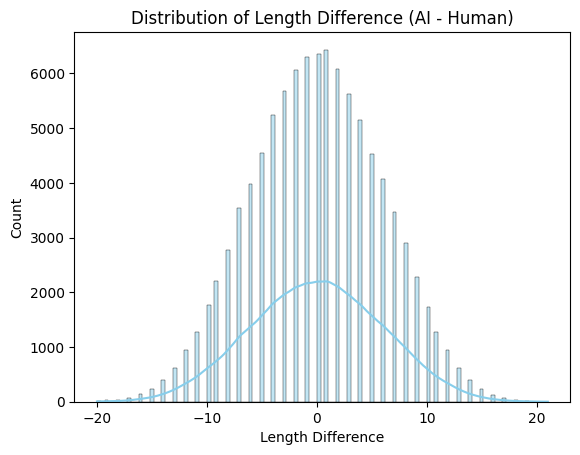

In [29]:
# 1. Length Difference Distribution

sns.histplot(df['length_diff'], kde=True, color='skyblue')
plt.title("Distribution of Length Difference (AI - Human)")
plt.xlabel("Length Difference")
plt.show()

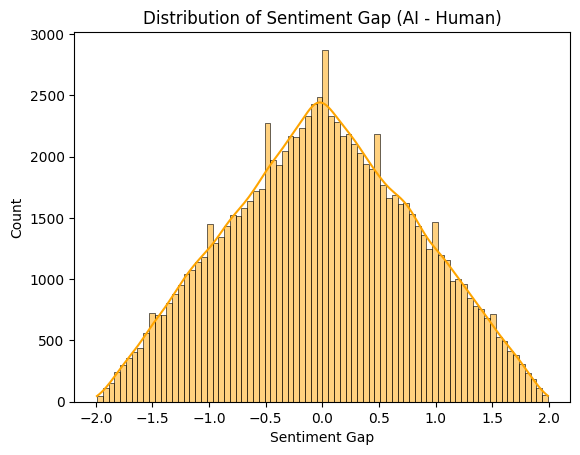

In [30]:
# 2. Sentiment Gap Distribution

sns.histplot(df['sentiment_gap'], kde=True, color='orange')
plt.title("Distribution of Sentiment Gap (AI - Human)")
plt.xlabel("Sentiment Gap")
plt.show()

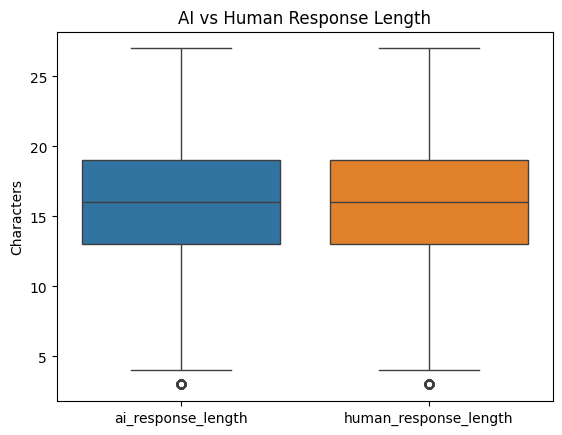

In [31]:
# 3. Response Length Comparison

sns.boxplot(data=df[['ai_response_length', 'human_response_length']])
plt.title("AI vs Human Response Length")
plt.ylabel("Characters")
plt.show()

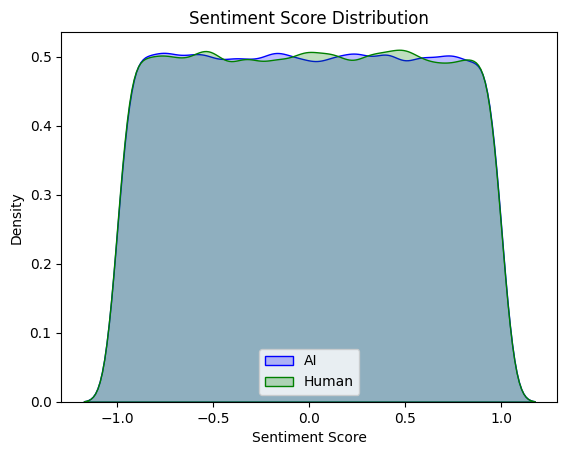

In [32]:
# 4. Sentiment Score Comparison

sns.kdeplot(df['ai_sentiment_score'], label='AI', fill=True, color='blue')
sns.kdeplot(df['human_sentiment_score'], label='Human', fill=True, color='green')
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.legend()
plt.show()

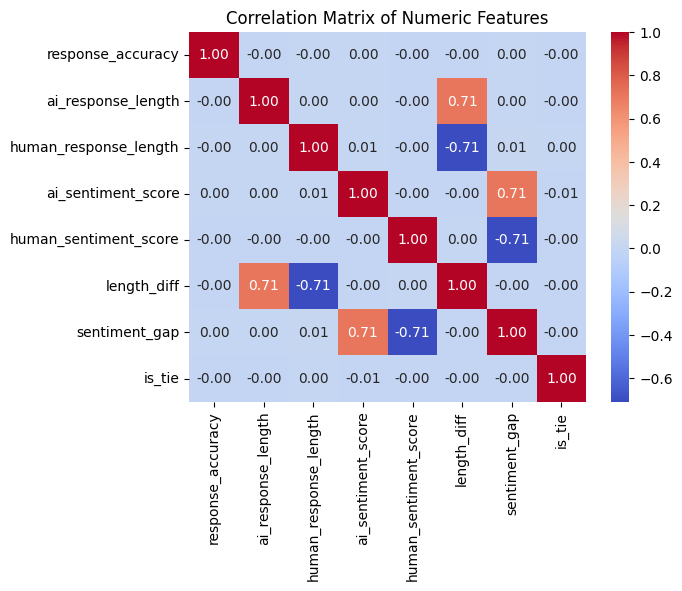

In [ ]:
# 5. Correlation Heatmap

numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

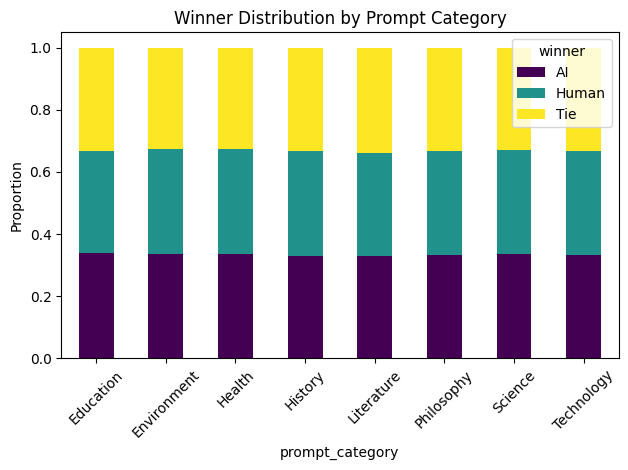

In [ ]:
# Now it's shwos the category vise visualization
# 1. Winner by Prompt Category

category_winner = df.groupby('prompt_category')['winner'].value_counts(normalize=True).unstack()
category_winner.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Winner Distribution by Prompt Category")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

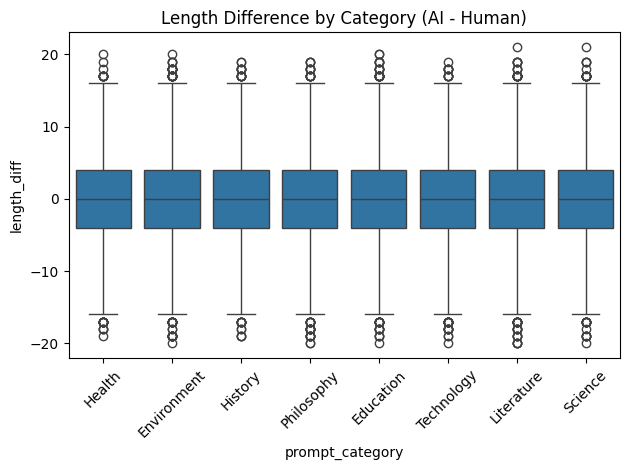

In [38]:
# 2. Length Difference by Category

sns.boxplot(data=df, x='prompt_category', y='length_diff')
plt.title("Length Difference by Category (AI - Human)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
from wordcloud import WordCloud

In [46]:
# 3. OPTIONAL: Word Cloud of Human Prompts

all_prompts = " ".join(df['human_prompt'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_prompts)

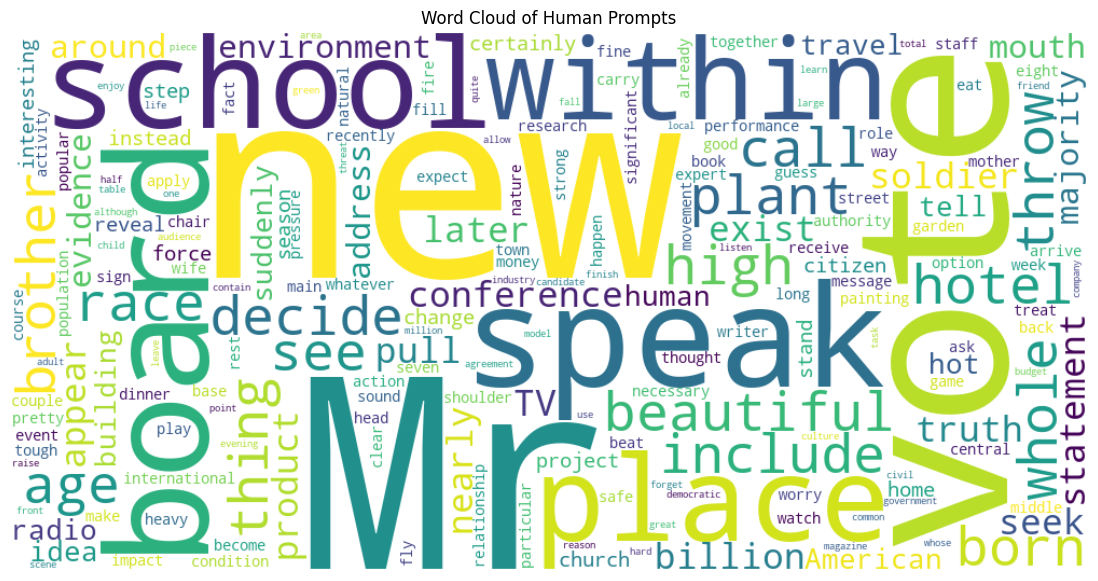

In [47]:
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Human Prompts")
plt.show()